Do the Hello World examplle on 2 -qubit Bell state

Step 1: Map the problem to circuits and operators

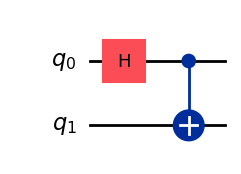

In [1]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0,1)

qc.draw(output='mpl')


from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')  
XX = Pauli('XX')
XI  = Pauli('XI')
IX = Pauli('IX')

observables = (ZZ,ZI,IZ,XX,XI,IX)


Step 2: Optimizied Circuit

Step 3: Execute on the backend

In [13]:
from qiskit_aer.primitives import Estimator

estimator = Estimator()

job = estimator.run([qc] * len(observables), observables)

job.result()

EstimatorResult(values=array([1.        , 0.03710938, 0.03710938, 1.        , 0.02539062,
       0.02539062]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'time_taken': 0.004730734, 'num_bind_params': 1, 'parallel_state_update': 2, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.000592761, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 6580, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.9986228942871094, 'simulator_metadata': [{'time_taken': 0.004730734, 'num_bind_params': 1, 'parallel_state_update': 2, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.000592761

# Step 4: Post-process(and plotting)

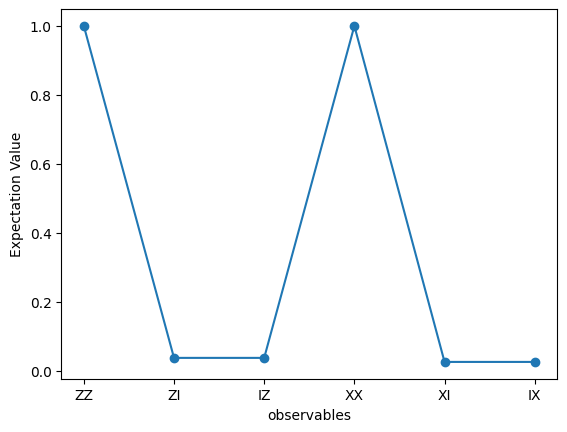

In [14]:
import matplotlib.pyplot as plt

data = ['ZZ', 'ZI', 'IZ','XX','XI','IX']
values = job.result().values

plt.plot(data,values,'-o')
plt.xlabel('observables')
plt.ylabel('Expectation Value')
plt.show()

        

# Extend Hello World to an n-qubit GHZ state

Step 1: Map the problem to ciercuis and operators

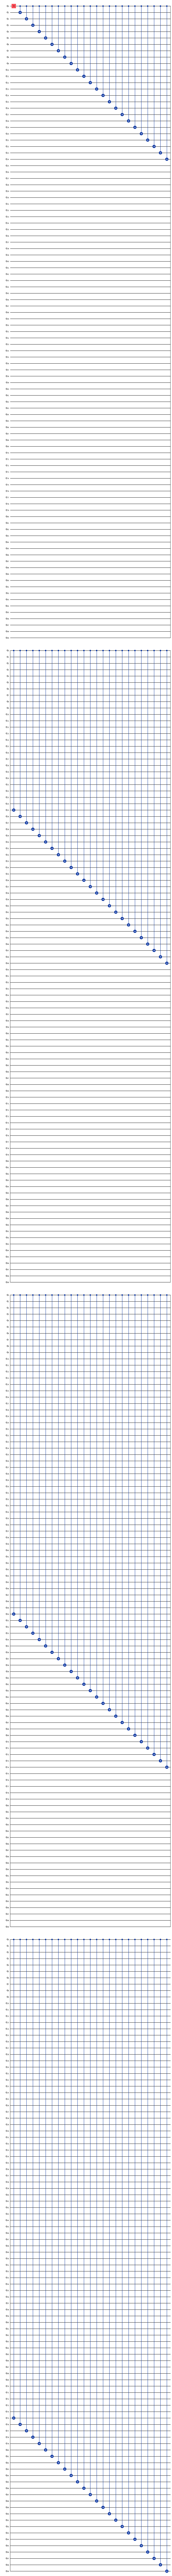

In [26]:
def get_qc_for_n_qubit_GHZ_stat(n):
    qc = QuantumCircuit(n)
    qc.h(0)
    for i in range(1,n):
        qc.cx(0,i)
    return qc

n = 100
qc = get_qc_for_n_qubit_GHZ_stat(n)
qc.draw(output='mpl')

In [27]:
from qiskit.quantum_info import SparsePauliOp

operator_strings = ['Z' + 'I' * i +  'Z' + 'I' * (n-2-i) for i in range(n-1)]
print(operator_strings)
print(len(operator_strings))

operators = [SparsePauliOp(operator_string) for operator_string in operator_strings]


['ZZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII

# Step 2:  Optimize the problem for quantum execution

In [8]:
from qiskit_ibm_runtime import QiskitRuntimeService

token = '3d045d6e750eabdc49bcddfe7e18a6609496226ced5bc01c4e62a29d83f5716176838cb7608e7069a5c13268ac0d51d8025dca4bdc31dc073251cc8741c2d30d'
instance = 'ibm-q/open/main'

# Save an IBM Cloud account.
QiskitRuntimeService.save_account(channel="ibm_cloud", token=token, 
                                  instance=instance,
                                  overwrite=True)

# Save your IBM Quantum API key
#QiskitRuntimeService.save_account(api_key=api_key)



In [12]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

service = QiskitRuntimeService()

backend = service.backend(backend_name)
pass_Manager = generate_preset_pass_manager(optimization_level=1, backend=backend)

qc_transpiled = pass_Manager.run(qc)
operators_transpiled_list = [op.apply_layout(qc_transpiled.layout) for op in operators]


ApiException: Error: Provided API key could not be found., Status code: 400